# 워드 클라우드

설치

In [ ]:
!conda install -c conda-forge wordcloud

데이터 가져오기

In [2]:
import pandas as pd
import lxml.html
import requests

In [3]:
res = requests.get('https://www.nytimes.com/2019/06/03/technology/itunes-shutting-down.html')

In [4]:
root = lxml.html.fromstring(res.text)

In [5]:
content = root.cssselect('[itemProp="articleBody"]')[0].text_content()

TDM

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [7]:
tdm = cv.fit_transform([content]).toarray()

In [8]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

C:\Users\1pc\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [9]:
df.sort_values('freq', ascending=False).head()

,word,freq
267,music,22
220,itunes,20
26,apple,16
287,people,11
235,like,6


단어 구름 그리기

In [10]:
from wordcloud import WordCloud

In [31]:
wc = WordCloud(width=400, height=400, background_color='white')
#wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [32]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

In [33]:
wc.fit_words(frequencies)

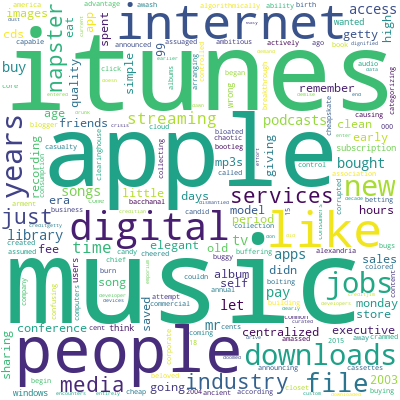

In [34]:
wc.to_image()

## 정규표현식
- 문자열의 찾기, 바꾸기를 위한 표현
- 텍스트 분석에서 다양한 전처리에 사용
- https://www.debuggex.com/ 에서 연습
- '[0123456789]'

In [15]:
import re # 정규표현식을 쓰겠다

찾기

In [16]:
text = '대책을 발표했습니다. 유재명 기자. 김동욱 기자 바른 뉴스 빠른 뉴스'

In [17]:
m = re.search('[가-힣]{2,} 기자', text)

In [18]:
m.group()

'유재명 기자'

In [35]:
m

<re.Match object; span=(12, 18), match='유재명 기자'>

모든 경우 찾기

In [19]:
re.findall(r'[가-힣]{2,} 기자', text) # 파이썬에서 정규표현식을 쓸때는 r을 붙인다

['유재명 기자', '김동욱 기자']

바꾸기

In [20]:
text2 = '영희의 주민번호 12345-2345678'

In [21]:
re.sub(r'[0-9]{6}-[0-9]{7}','######-#######', text2)

'영희의 주민번호 12345-2345678'

띄어쓰기가 2칸 이상인것을 1칸으로 변경

In [22]:
text = '오늘  밥을     먹었다'

In [23]:
re.sub(r' {1,}', ' ', text)

'오늘 밥을 먹었다'

In [24]:
text4 = '010-3526-4754 01035264754 (010)1234-5678'

위에서 숫자가 아닌 글자는 모두 지우되, 빈칸은 남겨 두세요.

In [25]:
re.sub(r'[^0-9 ]', '', text4)

'01035264754 01035264754 01012345678'